In [182]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [183]:
rain = pd.read_csv("IDCJAC0009_086338_1800_Data.csv")
foot_traffic = pd.read_csv("July_2022.csv")

## Rain clean

In [184]:
rain

,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,IDCJAC0009,86338,2013,1,1,NaN,NaN,NaN
1,IDCJAC0009,86338,2013,1,2,NaN,NaN,NaN
2,IDCJAC0009,86338,2013,1,3,NaN,NaN,NaN
3,IDCJAC0009,86338,2013,1,4,NaN,NaN,NaN
4,IDCJAC0009,86338,2013,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3518,IDCJAC0009,86338,2022,8,20,4.4,1.0,N
3519,IDCJAC0009,86338,2022,8,21,0.0,1.0,N
3520,IDCJAC0009,86338,2022,8,22,0.0,1.0,N
3521,IDCJAC0009,86338,2022,8,23,8.8,1.0,N


In [185]:
rain.columns


Index(['Product code', 'Bureau of Meteorology station number', 'Year', 'Month',
       'Day', 'Rainfall amount (millimetres)',
       'Period over which rainfall was measured (days)', 'Quality'],
      dtype='object')

In [186]:
rain = rain.drop(labels=['Product code', 'Bureau of Meteorology station number'], axis=1)

In [187]:
def make_date_col(df):
    df["date"] = df['Day'].astype(str) + "/" + df['Month'].astype(str) + "/" + df['Year'].astype(str)
    df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
    return df['date']

In [188]:
rain["date"] = make_date_col(rain)

In [189]:
rain

,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,date
0,2013,1,1,NaN,NaN,NaN,2013-01-01
1,2013,1,2,NaN,NaN,NaN,2013-01-02
2,2013,1,3,NaN,NaN,NaN,2013-01-03
3,2013,1,4,NaN,NaN,NaN,2013-01-04
4,2013,1,5,NaN,NaN,NaN,2013-01-05
...,...,...,...,...,...,...,...
3518,2022,8,20,4.4,1.0,N,2022-08-20
3519,2022,8,21,0.0,1.0,N,2022-08-21
3520,2022,8,22,0.0,1.0,N,2022-08-22
3521,2022,8,23,8.8,1.0,N,2022-08-23


In [190]:
rain

,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,date
0,2013,1,1,NaN,NaN,NaN,2013-01-01
1,2013,1,2,NaN,NaN,NaN,2013-01-02
2,2013,1,3,NaN,NaN,NaN,2013-01-03
3,2013,1,4,NaN,NaN,NaN,2013-01-04
4,2013,1,5,NaN,NaN,NaN,2013-01-05
...,...,...,...,...,...,...,...
3518,2022,8,20,4.4,1.0,N,2022-08-20
3519,2022,8,21,0.0,1.0,N,2022-08-21
3520,2022,8,22,0.0,1.0,N,2022-08-22
3521,2022,8,23,8.8,1.0,N,2022-08-23


In [191]:
def filter_weathers(df):
    df = df.loc[(df['date'] >= '2022-07-01') & (df['date'] <= '2022-07-31')]
    return df

In [192]:
rain = rain.loc[(rain['date'] >= '2022-07-01')
                     & (rain['date'] <= '2022-07-31')]
rain

,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,date
3468,2022,7,1,0.0,1.0,N,2022-07-01
3469,2022,7,2,0.0,1.0,N,2022-07-02
3470,2022,7,3,0.0,1.0,N,2022-07-03
3471,2022,7,4,0.0,1.0,N,2022-07-04
3472,2022,7,5,0.0,1.0,N,2022-07-05
3473,2022,7,6,0.0,1.0,N,2022-07-06
3474,2022,7,7,0.4,1.0,N,2022-07-07
3475,2022,7,8,2.4,1.0,N,2022-07-08
3476,2022,7,9,5.8,1.0,N,2022-07-09
3477,2022,7,10,0.6,1.0,N,2022-07-10


In [193]:
rain.rename(columns={'Rainfall amount (millimetres)':"total_rain"},inplace=True)

c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [194]:
rain

,Year,Month,Day,total_rain,Period over which rainfall was measured (days),Quality,date
3468,2022,7,1,0.0,1.0,N,2022-07-01
3469,2022,7,2,0.0,1.0,N,2022-07-02
3470,2022,7,3,0.0,1.0,N,2022-07-03
3471,2022,7,4,0.0,1.0,N,2022-07-04
3472,2022,7,5,0.0,1.0,N,2022-07-05
3473,2022,7,6,0.0,1.0,N,2022-07-06
3474,2022,7,7,0.4,1.0,N,2022-07-07
3475,2022,7,8,2.4,1.0,N,2022-07-08
3476,2022,7,9,5.8,1.0,N,2022-07-09
3477,2022,7,10,0.6,1.0,N,2022-07-10


## Foot traffic clean

In [195]:
foot_traffic

,Date,Hour,Bourke Street Mall (North),Bourke Street Mall (South),Melbourne Central,Town Hall (West),Princes Bridge,Flinders Street Station Underpass,Birrarung Marr,Webb Bridge,...,Bourke St - Spencer St (South),Spring St- Flinders St (West),Macaulay Rd-Bellair St,Harbour Esplanade (West) - Pedestrian Path,Harbour Esplanade (West) - Bike Path,Flinders St (South),Elizabeth St - Flinders St (East) - New footpath,Macaulay Rd (North),Queensberry St - Errol St (South),Errol St (West)
0,1/07/2022,0,26,50,243,104,76,125,na,8,...,na,1,na,na,10,79,156,4,2,6
1,1/07/2022,1,17,55,157,56,58,75,na,10,...,na,na,na,na,16,39,105,na,2,2
2,1/07/2022,2,13,18,118,42,39,21,1,na,...,na,1,na,1,na,35,93,na,na,na
3,1/07/2022,3,8,23,111,23,37,23,na,3,...,na,na,2,1,1,19,62,na,1,1
4,1/07/2022,4,10,10,101,18,34,32,na,na,...,na,3,na,na,1,9,65,na,na,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,31/07/2022,19,101,270,1704,1091,757,663,1,184,...,na,25,35,674,123,458,956,61,46,94
740,31/07/2022,20,81,236,1223,745,897,593,na,45,...,na,15,22,82,25,377,896,43,20,54
741,31/07/2022,21,63,135,996,478,496,439,na,30,...,na,9,20,65,7,320,649,9,25,52
742,31/07/2022,22,11,93,681,468,372,392,na,22,...,na,24,4,47,3,242,549,17,4,16


In [196]:
foot_traffic=foot_traffic.replace(to_replace=["na","undefined"],value=0)

In [197]:
foot_traffic["total_people"] = foot_traffic.iloc[:,2:].sum(axis=1)

In [198]:
foot_traffic["Date"] = pd.to_datetime(foot_traffic["Date"], format="%d/%m/%Y")

In [199]:
foot_traffic = foot_traffic.groupby("Date").sum().reset_index()

In [200]:
foot_traffic.rename(columns={'Date':'date'}, inplace=True)

In [201]:
foot_traffic.loc[:,['date','total_people']]

,date,total_people
0,2022-07-01,435062
1,2022-07-02,501883
2,2022-07-03,386038
3,2022-07-04,356396
4,2022-07-05,370637
5,2022-07-06,423220
6,2022-07-07,390030
7,2022-07-08,379723
8,2022-07-09,458521
9,2022-07-10,372983


# Join and plot 

In [202]:
df= rain.loc[:,["date","total_rain"]].merge(foot_traffic.loc[:,['date','total_people']], on = "date")

Text(0, 0.5, 'Foot traffic')

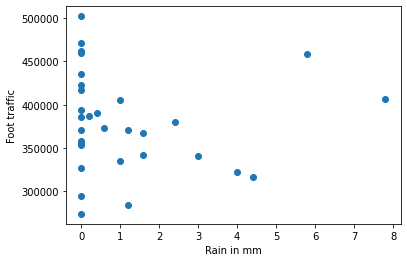

In [203]:
plt.scatter(df["total_rain"],df["total_people"])
plt.xlabel("Rain in mm")
plt.ylabel("Foot traffic")

#### Max temp clean

In [204]:
# max_temp= pd.read_csv("IDCJAC0010_086338_2022_Data.csv")
# min_temp= pd.read_csv("IDCJAC0011_086338_2022_Data.csv")

# NC: updated to use the all years data for max and min temp
max_temp = pd.read_csv("IDCJAC0010_086338_1800_Data.csv")
min_temp = pd.read_csv("IDCJAC0011_086338_1800_Data.csv")
solar_exp = pd.read_csv("IDCJAC0016_086338_1800_Data.csv")

In [205]:
max_temp['date'] = make_date_col(max_temp)
min_temp['date'] = make_date_col(min_temp)
solar_exp['date'] = make_date_col(solar_exp)

In [206]:
max_temp=filter_weathers(max_temp)
min_temp=filter_weathers(min_temp)
solar_exp=filter_weathers(solar_exp)

In [207]:
max_temp.rename(columns={"Maximum temperature (Degree C)":"max_temp"},inplace=True)

In [208]:
min_temp.rename(columns={"Minimum temperature (Degree C)":"min_temp"},inplace=True)

In [209]:
solar_exp.rename(columns={"Daily global solar exposure (MJ/m*m)":"solar_exp"},inplace=True)

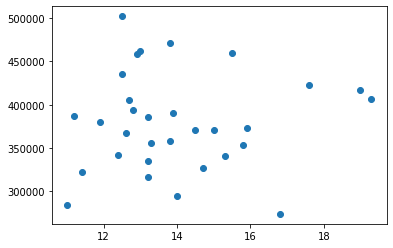

In [210]:
plt.scatter(max_temp["max_temp"],df["total_people"])


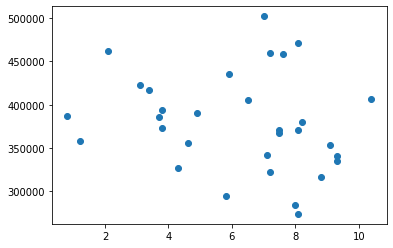

In [211]:
plt.scatter(min_temp["min_temp"],df["total_people"])

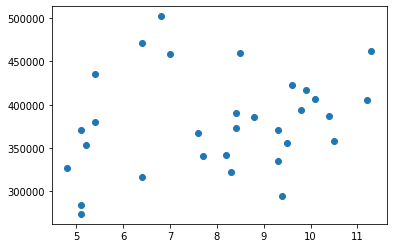

In [212]:
plt.scatter(solar_exp["solar_exp"],df["total_people"])

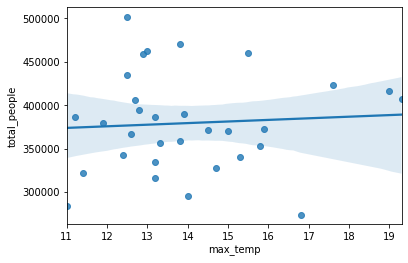

In [213]:
sns.regplot(x=max_temp["max_temp"], y=df["total_people"]);

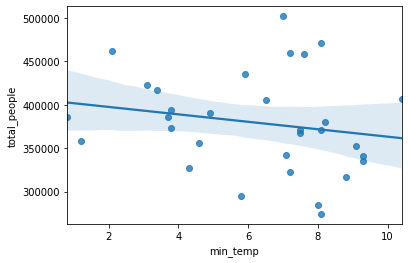

In [214]:
sns.regplot(x=min_temp["min_temp"], y=df["total_people"]);

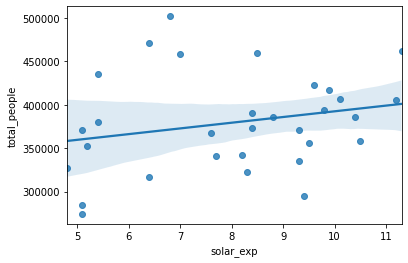

In [215]:
sns.regplot(x=solar_exp["solar_exp"], y=df["total_people"]);

Write out a datafile with the date and the total foot traffic numbers in Melbourne, for future use

Also, create a datafile with the foot traffic and all the weather columns by day for Melbourne, we can use that later as a source datafile for basic modelling

In [216]:
# Foot Traffic by day Data
dfFootTraffic = foot_traffic.loc[:,['date','total_people']]
dfFootTraffic.to_csv("./data_files/FootTraffic_July2022_Melbourne.csv", index=False)

print(dfFootTraffic.info())
dfFootTraffic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          31 non-null     datetime64[ns]
 1   total_people  31 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 624.0 bytes
None


,date,total_people
0,2022-07-01,435062
1,2022-07-02,501883
2,2022-07-03,386038
3,2022-07-04,356396
4,2022-07-05,370637


In [217]:
rain.head()

,Year,Month,Day,total_rain,Period over which rainfall was measured (days),Quality,date
3468,2022,7,1,0.0,1.0,N,2022-07-01
3469,2022,7,2,0.0,1.0,N,2022-07-02
3470,2022,7,3,0.0,1.0,N,2022-07-03
3471,2022,7,4,0.0,1.0,N,2022-07-04
3472,2022,7,5,0.0,1.0,N,2022-07-05


The data we want is total rain, and also Quality, which is a Y/N and shows whether the rain measurement has passed full quality control. If N, then the measurement might be suspect

In [218]:
dfRainToMerge = rain[["total_rain", "Quality", "date"]]
dfRainToMerge.rename(columns={"Quality":"rain_quality"},inplace=True)

dfFootTrafficWeather = pd.merge(dfFootTraffic, dfRainToMerge, how="inner", on="date")
dfFootTrafficWeather.head()

c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,date,total_people,total_rain,rain_quality
0,2022-07-01,435062,0.0,N
1,2022-07-02,501883,0.0,N
2,2022-07-03,386038,0.0,N
3,2022-07-04,356396,0.0,N
4,2022-07-05,370637,0.0,N


In [219]:
# Merge the Max Temp
dfMaxTempToMerge = max_temp[["max_temp", "Quality", "date"]]
dfMaxTempToMerge.rename(columns={"Quality":"max_temp_quality"},inplace=True)
dfFootTrafficWeather = pd.merge(dfFootTrafficWeather, dfMaxTempToMerge, how="inner", on="date")

# Merge the Max Temp
dfMinTempToMerge = min_temp[["min_temp", "Quality", "date"]]
dfMinTempToMerge.rename(columns={"Quality":"min_temp_quality"},inplace=True)
dfFootTrafficWeather = pd.merge(dfFootTrafficWeather, dfMinTempToMerge, how="inner", on="date")

dfFootTrafficWeather.head()

c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality
0,2022-07-01,435062,0.0,N,12.5,Y,5.9,Y
1,2022-07-02,501883,0.0,N,12.5,Y,7.0,Y
2,2022-07-03,386038,0.0,N,13.2,Y,3.7,Y
3,2022-07-04,356396,0.0,N,13.3,Y,4.6,Y
4,2022-07-05,370637,0.0,N,15.0,Y,7.5,Y


In [220]:
solar_exp.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,solar_exp,date
11869,IDCJAC0016,86338,2022,7,1,5.4,2022-07-01
11870,IDCJAC0016,86338,2022,7,2,6.8,2022-07-02
11871,IDCJAC0016,86338,2022,7,3,8.8,2022-07-03
11872,IDCJAC0016,86338,2022,7,4,9.5,2022-07-04
11873,IDCJAC0016,86338,2022,7,5,9.3,2022-07-05


In [221]:
# Merge the Solar Exposure
dfSolarExpToMerge = solar_exp[["solar_exp", "date"]]
dfFootTrafficWeather = pd.merge(dfFootTrafficWeather, dfSolarExpToMerge, how="inner", on="date")

print(dfFootTrafficWeather.info())
dfFootTrafficWeather.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              31 non-null     datetime64[ns]
 1   total_people      31 non-null     int64         
 2   total_rain        31 non-null     float64       
 3   rain_quality      31 non-null     object        
 4   max_temp          31 non-null     float64       
 5   max_temp_quality  31 non-null     object        
 6   min_temp          31 non-null     float64       
 7   min_temp_quality  31 non-null     object        
 8   solar_exp         31 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 2.4+ KB
None


,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp
0,2022-07-01,435062,0.0,N,12.5,Y,5.9,Y,5.4
1,2022-07-02,501883,0.0,N,12.5,Y,7.0,Y,6.8
2,2022-07-03,386038,0.0,N,13.2,Y,3.7,Y,8.8
3,2022-07-04,356396,0.0,N,13.3,Y,4.6,Y,9.5
4,2022-07-05,370637,0.0,N,15.0,Y,7.5,Y,9.3


Write out all the joined data to file

In [222]:
dfFootTrafficWeather.to_csv("./data_files/FootTrafficWeather_July2022_Melbourne.csv", index=False)